Initialization

In [65]:
import pyscal as pc
import os
import pyscal.traj_process as ptp
import matplotlib.pyplot as plt
import numpy as np
import string
from scipy.io import savemat
import pickle

Read Files

In [82]:
#def calculate_q(file, format="lammps-dump"):
file='POSCAR_Al1_Al2'
format="poscar"
sys1 = pc.System()
sys1.read_inputfile(file, format=format)
sys1.find_neighbors(method="voronoi")
#sys1.calculate_q([2,4,5,6],averaged=True)
#q = sys.get_qvals([2,4,5,6],averaged=True)
#sys1.to_file('out',format='poscar')
#sys.to_file('out'+file,customkeys=['aq2','aq4','aq5','aq6'])


PDF-Total

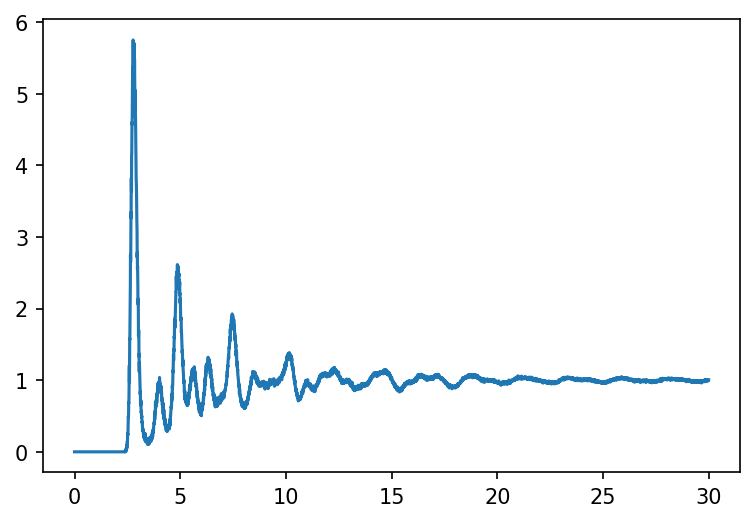

In [83]:

histnum=5000#直方图分割数量(密度)
pdf, r=sys1.calculate_pdf(histnum,cut=30)
plt.figure(dpi=150)
#plt.plot(r[0:int(len(r)/2)],pdf[0:int(len(pdf)/2)]);
plt.plot(r,pdf);
#a=np.ones(histnum)#扩展周期
#pdf[int((len(pdf)/2)):]=1 #extend PDF and set tail of PDF to 1 in order to get better resolution in SF
#a[0:len(pdf)]=pdf
#pdf=a
#dr=r[1]-r[0]
#r=np.arange(len(pdf))*dr

PDF-Partial

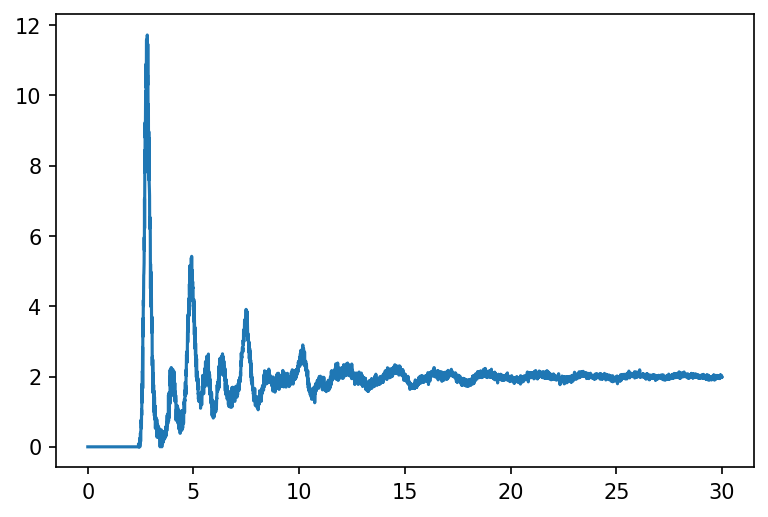

In [84]:
histnum=5000#直方图分割数量(密度)
pdfp, r=sys1.calculate_pdf(histnum,cut=30,partial=True,centertype=1,secondtype=2)
plt.figure(dpi=150)
#plt.plot(r[0:int(len(r)/2)],pdf[0:int(len(pdf)/2)]);
plt.plot(r,pdfp);

Bond Angle Distribution

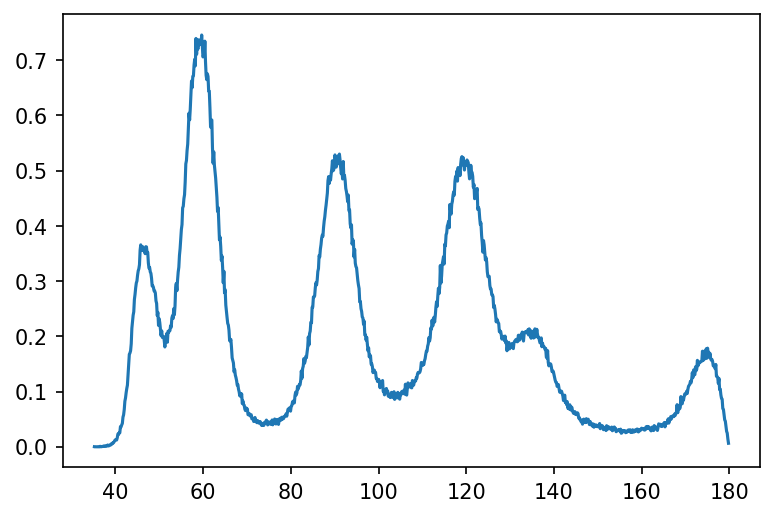

In [79]:
bad, r2=sys1.calculate_bad(1000);
plt.figure(dpi=150)
plt.plot(r2*180/np.pi,bad);

Structure Factor-FFT Method

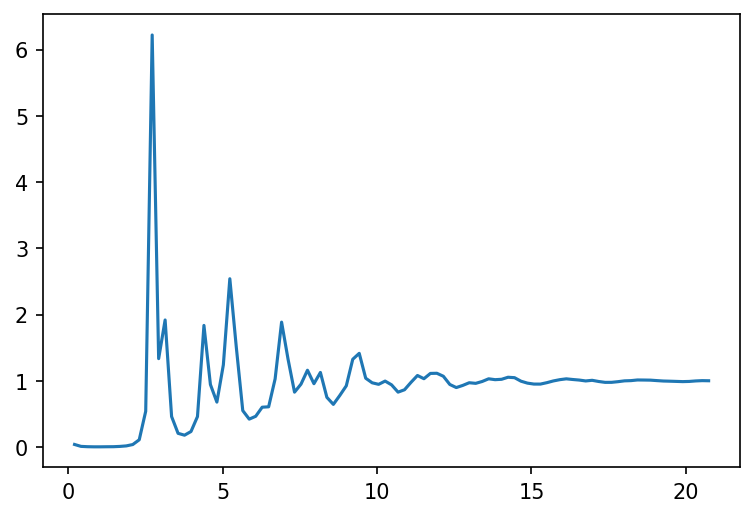

In [85]:
sf,q=sys1.calculate_sf(pdf, r,0);
plt.figure(dpi=150)
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);


Structure Factor-Integration Method

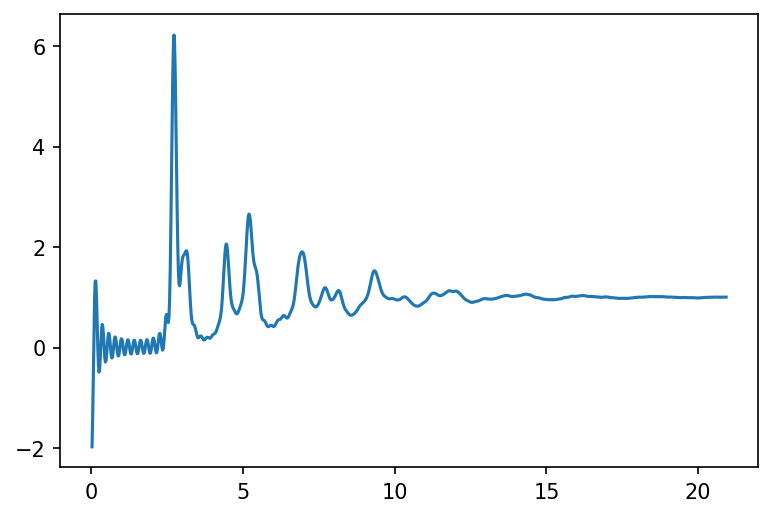

In [86]:
sf,q=sys1.calculate_sf(pdf, r,10);
plt.figure(dpi=150)
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);

SRO-Cowley

In [87]:
SRO_Cowley=sys1.calculate_pmsro(reference_type=1,compare_type=2)
print('The Cowley SRO is '+str(SRO_Cowley[0]))

The Cowley SRO is 0.0393368970897108


SRO-Cargill-Spaepen

In [88]:
SRO_CS_unnorm=sys1.calculate_pmsro_CS(reference_type=1,compare_type=2,normalization=False)
SRO_CS_norm=sys1.calculate_pmsro_CS(reference_type=1,compare_type=2,normalization=True)
print('The Cowley SRO (unnormalized) is '+str(SRO_CS_unnorm))
print('The Cowley SRO (nnormalized)  is '+str(SRO_CS_norm))


The Cowley SRO (unnormalized) is -0.03794064956327503
The Cowley SRO (nnormalized)  is -0.3892886598620064


CNA

In [89]:
CNA=sys1.calculate_cna()
print('CNA: '+str(CNA))

CNA: {'others': 4038, 'fcc': 5738, 'hcp': 1139, 'bcc': 61, 'ico': 0}


Voronoi Structure Identification

In [90]:
sys1.calculate_vorovector()

print('the vorovector (n3, n4, n5, n6) for Atom 0 is '+str(sys1.atoms[0].vorovector))

the vorovector (n3, n4, n5, n6) for Atom 0 is [0, 14, 0, 0]


In [91]:
sys1.calculate_q([2,4,5,6])
BOO=sys1.get_qvals([2,4,5,6])
print('the BOO number (q2, q4, q5, q6) for Atom 0 is '+str(BOO[0][0])+' '+str(BOO[0][1])+' '+str(BOO[0][2])+' '+str(BOO[0][3]))

the BOO number (q2, q4, q5, q6) for Atom 0 is 0.09328374905692187 0.06986055915482668 0.10704426180048338 0.07135551396271009


Visualization

In [92]:
sys1.show()

interactive(children=(FloatSlider(value=1.0, description='radius', max=30.0, min=1.0, step=1.0), Text(value='S…